In [17]:
#Todays  task is to perform KNN Scratch implementaiton: for the following groceries data set :
#!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
#step 1) do basic pre processing
#step 2) Scratch implementaion of KNN
#step 3) KNN - SKlearn version

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("--- Data Head ---")
print(df.head())

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

--- Data Head ---
   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  class
0       3  12669  9656     7561     214              2674        1338      2
1       3   7057  9810     9568    1762              3293        1776      2
2       3   6353  8808     7684    2405              3516        7844      2
3       3  13265  1196     4221    6404               507        1788      1
4       3  22615  5410     7198    3915              1777        5185      1

Training data shape: (352, 7)
Testing data shape: (88, 7)


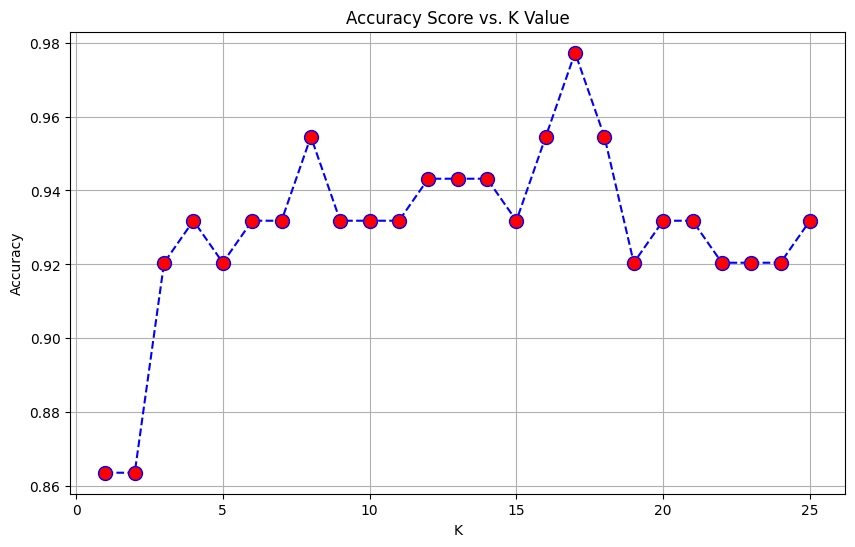

The highest accuracy is 0.9773 at k = 17


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN_Scratch:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

k_range = range(1, 26, 2)
accuracies = []

for k in k_range:
    model = KNN_Scratch(k=k)
    model.fit(X_train_scaled, y_train.to_numpy())
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Score vs. Odd K Values')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_range)
plt.show()

optimal_k_index = np.argmax(accuracies)
optimal_k = list(k_range)[optimal_k_index]
print(f"The highest accuracy among odd k-values is {max(accuracies):.4f} at k = {optimal_k}")

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_sklearn = KNeighborsClassifier(n_neighbors=k_value)

knn_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = knn_sklearn.predict(X_test_scaled)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"--- KNN From Scikit-learn (k={k_value}) ---")
print(f"Accuracy: {accuracy_sklearn:.4f}\n")

print("--- Classification Report (Scikit-learn) ---")

print(classification_report(y_test, y_pred_sklearn))

--- KNN From Scikit-learn (k=5) ---
Accuracy: 0.9318

--- Classification Report (Scikit-learn) ---
              precision    recall  f1-score   support

           1       0.88      0.82      0.85        17
           2       0.97      0.94      0.96        36
           3       0.92      0.97      0.94        35

    accuracy                           0.93        88
   macro avg       0.92      0.91      0.92        88
weighted avg       0.93      0.93      0.93        88

